# Business Problem
In this competitive business environment, Insurance companies are adopting aggressive marketing strategies for new customer acquisition and existing customer retention. To adapt to the changing market landscape, an organization must monitor changes in buying patterns and behavior of the customers based on various demographics, geographies & psychographics profile. The analysis of existing customer’s data can through many insights of the customer such as their buying behavior, buying Pattern, brand loyalty, investment pattern & customer churn. Such insight can be of great help to Marketing Head while devising new Marketing strategy.

While embracing digital is integral to competing in the market, consumers still heavily rely on the human, one-on-one service that only agents are able to provide. Great customer service is foundational for all agents. Providing the ideal mix of technology solutions and personal interaction should be at the center of an agency’s planning process as it prepares to meet customer demands and increase growth and retention.

NationWide Bank in the United States, Besides usual services, this bank also provides car insurance services. The bank organizes regular campaigns to attract new clients. The bank has potential customers’ data, and bank’s employees call them for advertising available car insurance options.

At NationWide (https://www.nationwide.com/) the mission is to help people and businesses prosper. NationWide is always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals. Their data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge.

Can we help the Marketing head with some kind of technology solutions which can enable planning process as it prepares to meet customer demands and increase growth and retention?

We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome).

You have data about 4000 customers who were contacted during the last campaign and for whom the results of campaign (did the customer buy insurance or not) are known. Let us build machine learning model to help NationWide.

Task and Approach:
The task is to predict for 1000 customers who were contacted during the current campaign, whether they will buy car insurance or not.

We will be using logistic Regression to predict it

# Step 1 : Importing LIbraries and Understanding Data
Numpy, pandas , seaborn and matplotlib.pyplot are imported with aliases np, pd, sns and plt respectively

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Read-in train and test datasets
Insurance_Data = pd.read_csv('D:\\Data_science_project\\Data_science_project\\logistic_regression\\carInsurance_train.csv')
Insurance_test = pd.read_csv('D:\\Data_science_project\\Data_science_project\\logistic_regression\\carInsurance_test.csv')

In [3]:
# Looking at shape of train data 
Insurance_Data.shape

(4000, 19)

We have 4000 customers of data with 19 columns to train the model and 1000 customers to test our model on. Here we will use the train and test data differently to train and test the model. As the data is in this format else we will use 70 and 30 split which we have used in the linear regression.

In [4]:
# Looking at shape of test data 
Insurance_test.shape

(1000, 19)

In [5]:
# Looking at the first five rows
Insurance_Data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [7]:
# Looking at the lst five rows
Insurance_Data.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
3999,4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


In [8]:
# What type of values are stored in the columns?
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [9]:
# Let's look at some statistical information about our dataframe.
Insurance_Data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [10]:
# This how we can get summary for the categorical data
Insurance_Data.describe(include=np.object) 

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,15:27:56,11:27:46
freq,893,2304,1988,2831,1049,437,3,3


# Step 2: Visualising Data

C:\Users\Sushmita Swain\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sushmita Swain\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sushmita Swain\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sushmita Swain\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sushmita Swain\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


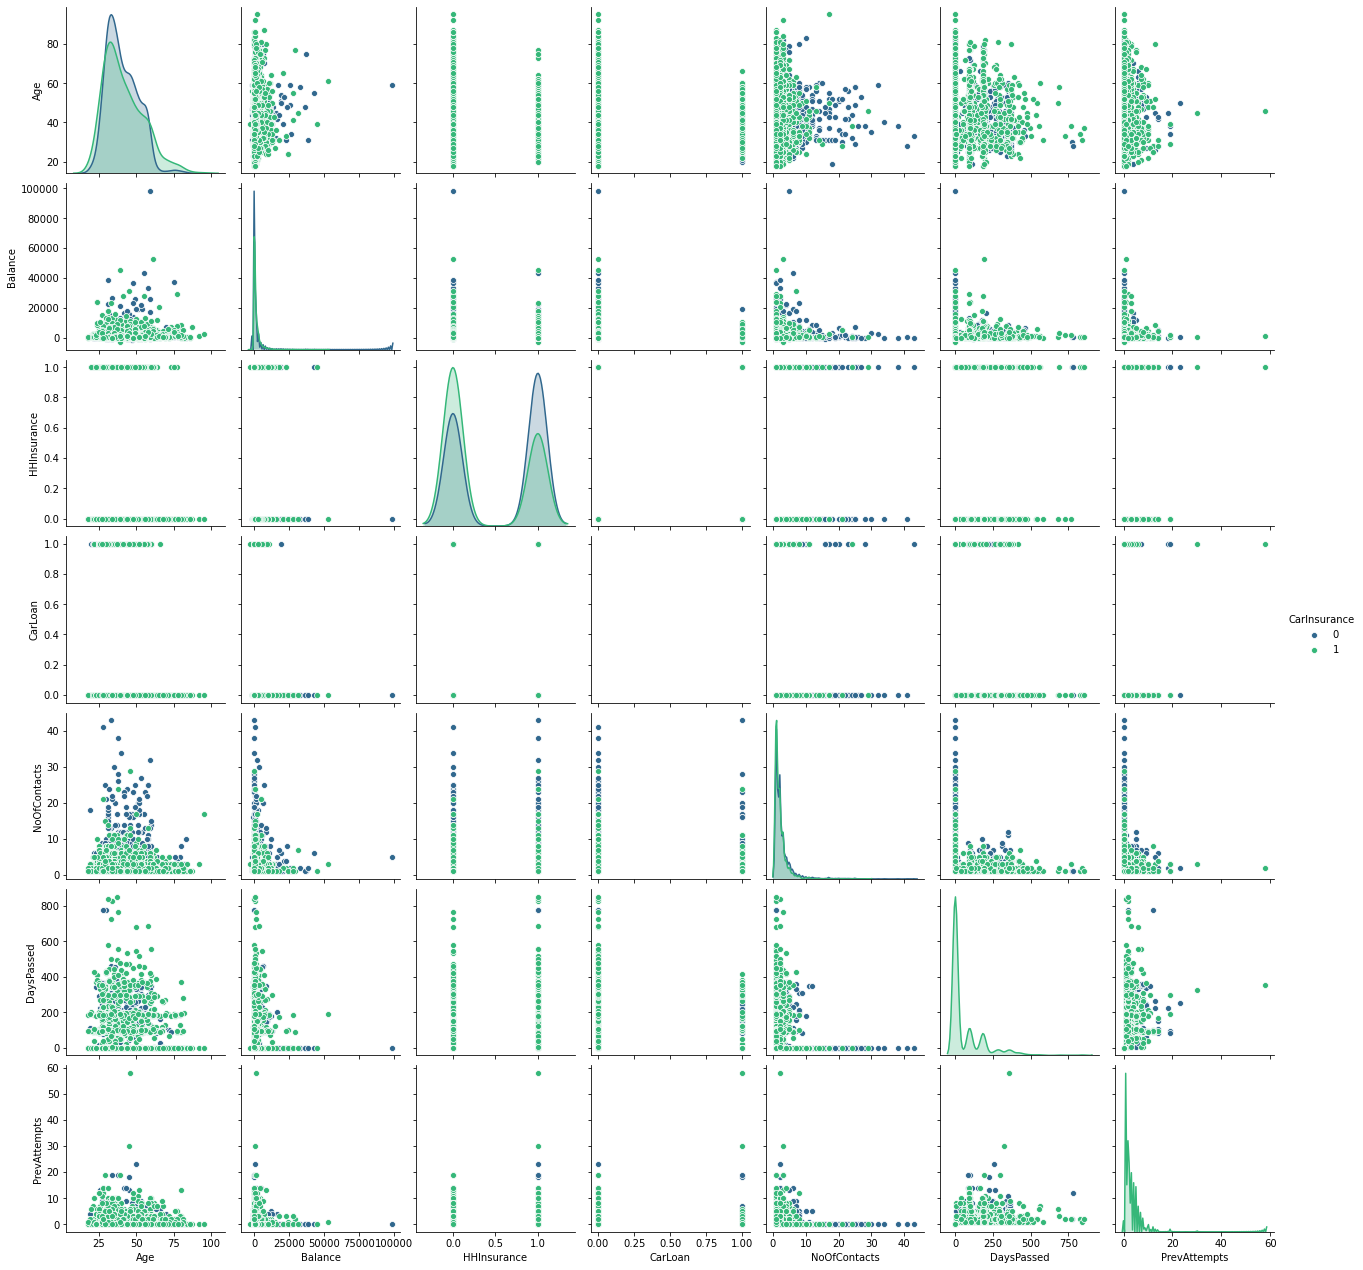

In [11]:
# Visualise the relationship between the features and the response using scatterplots
# Next, pair plot some important features
imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(Insurance_Data[imp_feats],hue='CarInsurance',palette='viridis',size=2.5)
plt.show()

Age: It's interesting to see that seniors are more likely to buy car insurance.

Balance: For balance, the data point at the upper right corner might be an outlier

HHInsurance: Households insured are less likely to buy car insurance

CarLoan: People with car loan are less likely to buy

NoOfContacts: Too many contacts causes customer attrition

DaysPassed: It looks like the more day passed since the last contact, the better

PrevAttempts: Also, more previous attempts, less likely to buy. There is a potential outlier here

C:\Users\Sushmita Swain\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


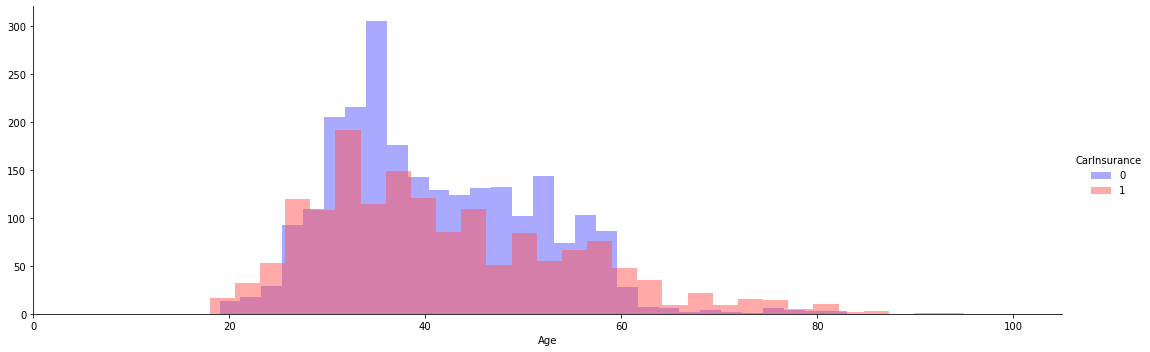

In [19]:
# Take a further look at Age
facet = sns.FacetGrid(Insurance_Data, hue='CarInsurance',size=5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5)
facet.set(xlim=(0,Insurance_Data.Age.max()+10))
facet.add_legend()

# Please try to do this for all the variables

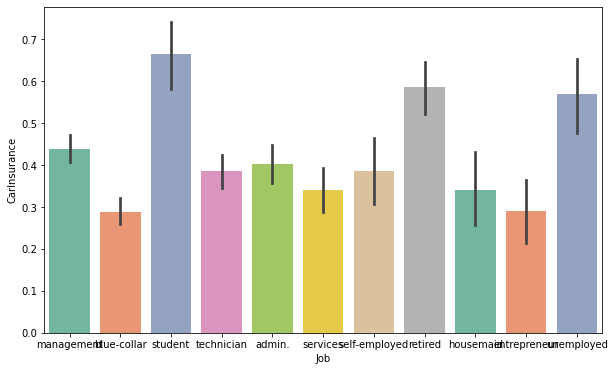

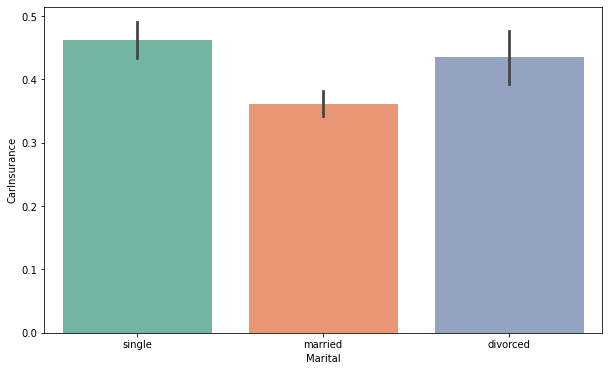

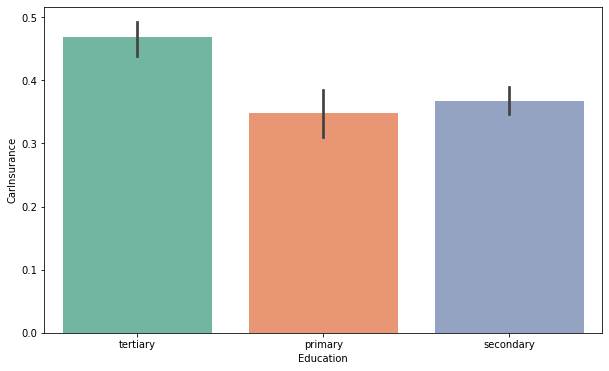

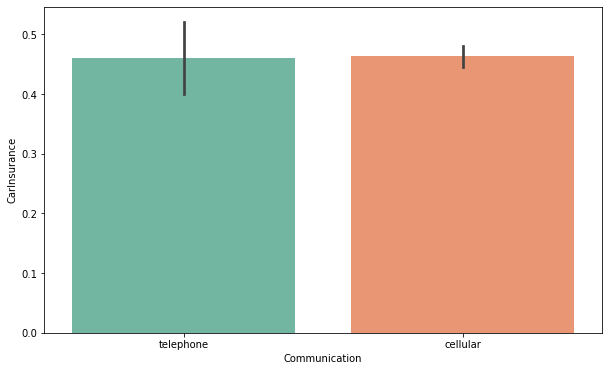

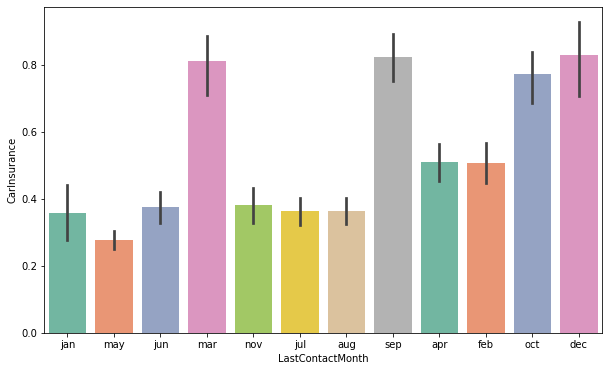

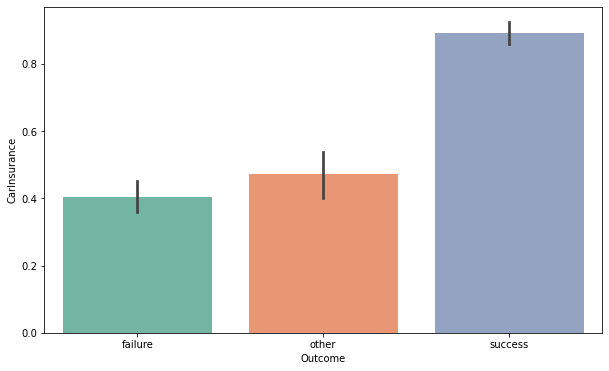

In [14]:
# Next check out categorical features
categorical_col = Insurance_Data.select_dtypes(include=['object']).columns
# We will not plot the CallStart and CallEnd so removing them
categorical_col_plot = categorical_col[(categorical_col!= 'CallStart') & (categorical_col!='CallEnd')]

# This loop will help us to print all the graphs in one go..
for feature in categorical_col_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'CarInsurance', data=Insurance_Data,palette='Set2')

In [15]:
# From the pairplot, we can see there is an outlier with extreme high balance. Drop that obs here.
Insurance_Data[Insurance_Data['Balance']>80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [17]:
#Removing above row
Insurance_Data = Insurance_Data.drop(Insurance_Data[Insurance_Data.index==1742].index)

In [18]:
# Merge train and test data here in order to impute missing values all at once
merge_data =pd.concat([Insurance_Data,Insurance_test],keys=('train','test'))
#Remving CarInsurance and ID 
merge_data.drop(['CarInsurance','Id'],axis=1,inplace=True)
# Getting shape of the merged data
print(merge_data.shape)

(4999, 17)


In [20]:
# Now let us check how many missing values are there in the columns and their percentage

# Total missing values in every column
total_missing = merge_data.isnull().sum()

# Calculate percentage
percentge = total_missing/merge_data.isnull().count()

# Combine total and percentage values
NAs = pd.concat([total_missing,percentge],axis=1,keys=('Total','Percentge'))

# Getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentge
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


In [21]:
# if you want to check  what total_missing contains
total_missing

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CallStart              0
CallEnd                0
dtype: int64

In [22]:
#before we do anything let us make a copy of the data. Why we are doing it?

# If we made some error it will not be on the original data 
#and we have a backup else we have to rerun above analysis
merge_data_df = merge_data.copy()

In [23]:
# Check for missing value in Outcome
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [24]:
# Fill missing outcome as not in previous campaign, we are adding one category to Outcome
# We will add category if the value of DaysPassed is -1
# Can you do it other ways.. yes this is one way of doing you can do it other ways also.

merge_data_df.loc[merge_data_df['DaysPassed']==-1,'Outcome']='NoPrev'

In [25]:
merge_data_df.groupby('Outcome')['Age'].count()

Outcome
NoPrev     3798
failure     548
other       248
success     405
Name: Age, dtype: int64

In [26]:
# Fill missing communication with none 
merge_data_df['Communication'].value_counts()
merge_data_df['Communication'].fillna('None',inplace=True)
merge_data_df['Communication'].value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

In [27]:
# Fill missing education with the most common education level by job type
merge_data_df['Education'].value_counts()

# Create job-education level mode mapping
edu_mode=[]

# What are different Job Types
job_types = merge_data_df.Job.value_counts().index

# Checking which job is most 
merge_data_df['Job'].value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [28]:
# Now according to the job type we will crate a mapping where the job and mode of education is there.

# It means when there are many people in the managment job then most of them are in which education.

# We can find that in below mapping

for job in job_types:
    mode = merge_data_df[merge_data_df.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=merge_data_df.Job.value_counts().index)

edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [30]:
# Apply the mapping to missing eductaion obs. We will replace education now by jobs value
for j in job_types:
    merge_data_df.loc[(merge_data_df['Education'].isnull()) & (merge_data_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

# For those who are not getting mapped we will create a new category as None
merge_data_df['Education'].fillna('None',inplace=True)

In [31]:
# How many jobs are null
merge_data_df['Job'].isnull().sum()

24

In [32]:
# Fill missing job with none
merge_data_df['Job'].fillna('None',inplace=True)

In [33]:
# Double check if there is still any missing value
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [34]:
numeric_datatypes = merge_data_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_datatypes

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts']

In [35]:
merge_data_df_num = merge_data_df[numeric_datatypes]

In [36]:
categorical_datatypes = merge_data_df.select_dtypes(include=['object']).columns.tolist()
categorical_datatypes

['Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome',
 'CallStart',
 'CallEnd']

In [37]:
# We are removing call start and call end
merge_data_df_cat = merge_data_df[['Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome']]

In [38]:
merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)

In [39]:
Insurance_Data_dummy = pd.concat([merge_data_df_num, merge_data_df_cat_dummies], axis=1)

In [40]:
Insurance_Data_dummy.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0             2          -1             0         0  ...   
      1             5          -1             0         0  ...   
      2             1         119             1         0  ...   
      3             2          -1             0         0  ...   
      4             1          -1             0         0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]

In [41]:
# Checking if there are missing values before we run model
Insurance_Data_dummy.isnull().sum(axis = 0)

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_None             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMonth_dec       0
LastContactMon

In [42]:
# Split train and test
idx=pd.IndexSlice
train_df=Insurance_Data_dummy.loc[idx[['train',],:]]
test_df=Insurance_Data_dummy.loc[idx[['test',],:]]
# Now create a lable here only
train_label=Insurance_Data['CarInsurance']

print(train_df.shape)
print(test_df.shape)

(3999, 47)
(1000, 47)


# Step 3 : Splitting the data in Training and Test set
Using sklearn we split 70% of our data into training set and rest in test set.

Setting random_state will give the same training and test set everytime on running the code.

In [43]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
# Train test split
# The change than of linear is that we have label seprate here
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, train_size=0.7 , random_state=100)

In [45]:
from sklearn.linear_model import LogisticRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LogisticRegression()
# fit the model to the training data
lr.fit(X_train,y_train)

C:\Users\Sushmita Swain\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Making predictions using the model
y_pred = lr.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [48]:
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)

Accuracy is  : 0.6766666666666666
F1 score is : 0.5101010101010102
Precision is  : 0.6332288401253918
Recall is  : 0.427061310782241
Roc Auc is  : 0.6330629800128537


We can check that we got 72.5 percentage accuracy and good ROC AUC area also.